# 🎨 Understanding Image Filters (Before CNNs)

Before using CNNs, let's understand **basic image filters**.

Filters are small matrices (kernels) that are **convolved** with an image to detect or enhance certain features.

### 🔹 Common Filters
| Filter | Purpose | Matrix |
|:--|:--|:--|
| Box Blur | Smooths the image | [[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]] |
| Sharpen | Enhances edges and details | [[0,-1,0],[-1,5,-1],[0,-1,0]] |
| Edge Detection | Highlights boundaries | [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]] |

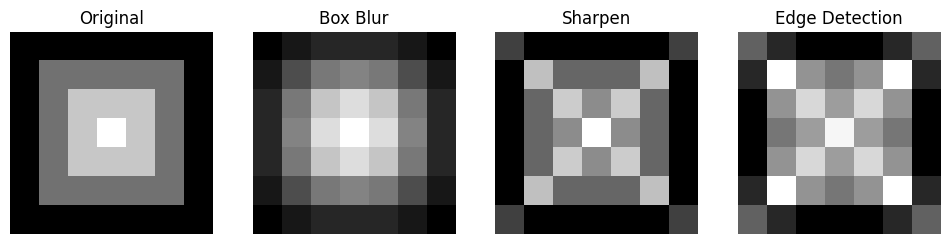

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

# Create a simple grayscale image (7x7 synthetic image)
image = np.array([
    [10, 10, 10, 10, 10, 10, 10],
    [10, 50, 50, 50, 50, 50, 10],
    [10, 50, 80, 80, 80, 50, 10],
    [10, 50, 80,100, 80, 50, 10],
    [10, 50, 80, 80, 80, 50, 10],
    [10, 50, 50, 50, 50, 50, 10],
    [10, 10, 10, 10, 10, 10, 10]
], dtype=np.float32)

# Define filters
filters = {
    'Box Blur': np.ones((3,3), dtype=np.float32)/9,
    'Sharpen': np.array([[0,-1,0],[-1,5,-1],[0,-1,0]], dtype=np.float32),
    'Edge Detection': np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]], dtype=np.float32)
}

# Convert image to torch tensor [1,1,H,W]
img_tensor = torch.from_numpy(image).unsqueeze(0).unsqueeze(0)

# Apply each filter
fig, axes = plt.subplots(1,4, figsize=(12,3))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

for i, (name, kernel) in enumerate(filters.items(), 1):
    kernel_tensor = torch.from_numpy(kernel).unsqueeze(0).unsqueeze(0)
    output = F.conv2d(img_tensor, kernel_tensor, padding=1)
    axes[i].imshow(output[0,0].detach().numpy(), cmap='gray')
    axes[i].set_title(name)
    axes[i].axis('off')

plt.show()

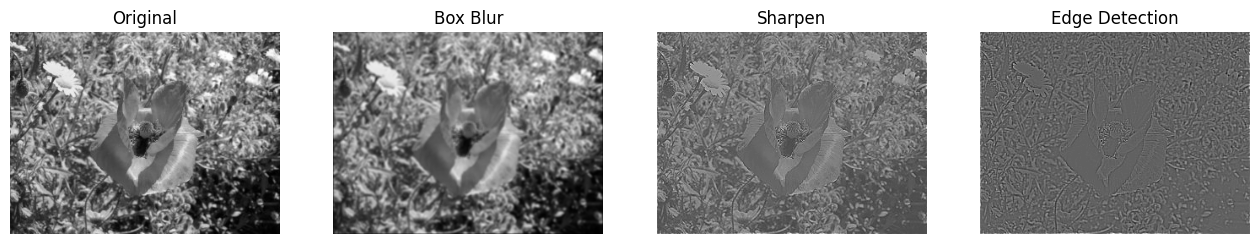

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
from PIL import Image

# Load your image (ensure it's grayscale)
image = Image.open("photo3.jpg").convert("L")  # 'L' mode = grayscale
image_np = np.array(image, dtype=np.float32)

# Normalize pixel values (optional, 0-255 → 0-1)
image_np /= 255.0

# Define filters
filters = {
    'Box Blur': np.ones((3,3), dtype=np.float32)/9,
    'Sharpen': np.array([[0,-1,0],[-1,5,-1],[0,-1,0]], dtype=np.float32),
    'Edge Detection': np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]], dtype=np.float32)
}

# Convert image to torch tensor [1,1,H,W]
img_tensor = torch.from_numpy(image_np).unsqueeze(0).unsqueeze(0)

# Apply each filter
fig, axes = plt.subplots(1, 4, figsize=(16, 5))
axes[0].imshow(image_np, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')

for i, (name, kernel) in enumerate(filters.items(), 1):
    kernel_tensor = torch.from_numpy(kernel).unsqueeze(0).unsqueeze(0)
    output = F.conv2d(img_tensor, kernel_tensor, padding=1)
    axes[i].imshow(output[0,0].detach().numpy(), cmap='gray')
    axes[i].set_title(name)
    axes[i].axis('off')

plt.show()
